In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [5]:
df.rename(columns={"Genre":"Gender","Annual Income (k$)":"Income",'Spending Score (1-100)':"Score"},inplace=True)

In [6]:
df

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [8]:
df["Gender"].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [9]:
df[["Age","Income","Score"]].describe()

,Age,Income,Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [10]:
df.isnull().sum()

CustomerID    0
Gender        0
Age           0
Income        0
Score         0
dtype: int64

In [11]:
df.drop(columns=["CustomerID","Gender","Age"],inplace=True)
# dropping "Gender" and "Age" only for understanding purpose for scatter plots to show clustering in real life we should not drop
# "Gender" and "Age" they are also import features

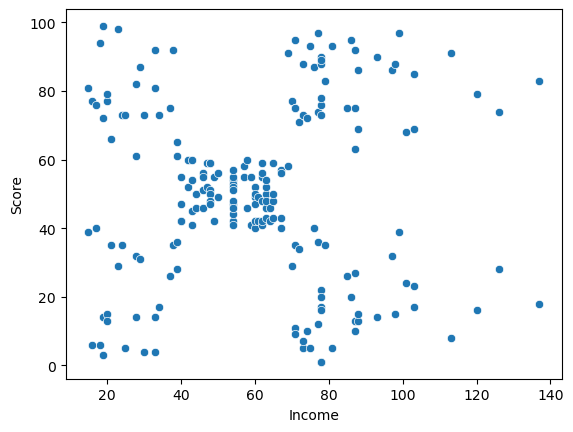

In [12]:
sns.scatterplot(x="Income",y="Score",data=df)
plt.show()

#### For Unsupervised Machine Learning, there is no output Variable
- Scaling is not mandatory for every algorithm, but it can improve the performance and accuracy of some algorithms that are sensitive to the range and distribution of the feature values. Scaling can also help to reduce the impact of outliers and ensure that the features are on the same scale.

In [13]:
X = df

# 1.K-Means Clustering
#### Find the Optimal Number of Clusters : Elbow Curve

In [14]:
wcss = []

for k in range(1,11):
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters = k, init = "k-means++")
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
print(wcss)

[269981.28, 183653.3289473684, 106348.37306211119, 73679.78903948834, 44448.45544793371, 37239.835542456036, 30259.65720728547, 25005.9348059662, 21850.165282585636, 19636.753964898155]


- A sudden drop in WCSS indicates a good fit for k.
- A gradual decrease, or even an increase, suggests overfitting or underfitting with the chosen k.

**init** : This sets the initialization method for the cluster centroids. Here, "k-means++" is used, which aims to improve the initial placement of centroids compared to the standard k-means initialization.


**kmeans.inertia_ :** property represents the WCSS. This value measures the total sum of squared distances from each data point to its assigned cluster centroid.

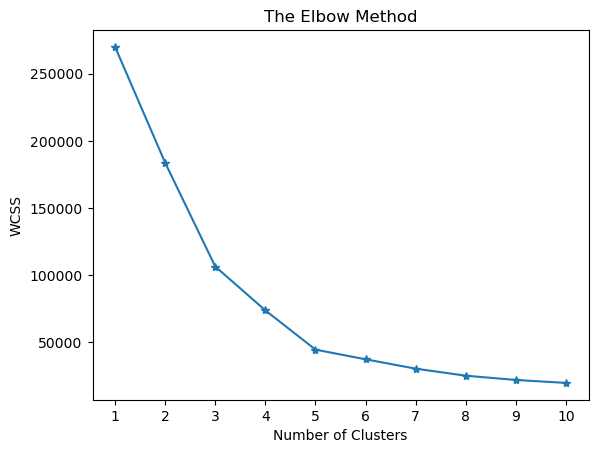

In [15]:
# Using the elbow method
plt.plot(range(1,11),wcss,marker="*")
plt.xticks(range(1,11))
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [16]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters =5 ,init = "k-means++", random_state=True)

# fit & Predict
X["km_cluster"] = kmeans.fit_predict(X)
X

,Income,Score,km_cluster
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4
...,...,...,...
195,120,79,3
196,126,28,1
197,126,74,3
198,137,18,1


In [17]:
X["km_cluster"].unique()

array([4, 2, 0, 3, 1])

In [18]:
X["km_cluster"].value_counts()

km_cluster
0    81
3    39
1    35
4    23
2    22
Name: count, dtype: int64

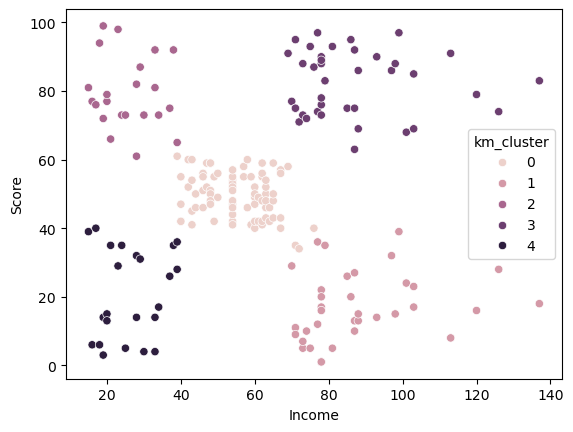

In [19]:
sns.scatterplot(x='Income',y="Score",hue="km_cluster",data=X)
plt.show()

#### Clustering - Observation
- Cluster 0 : Average Income, Average Spending Score - Can target these set of customers by providing them with Low cost EMI's etc.
- Cluster 1 : High Income, Low spending Score - Target these customers by asking the feedback and advertising the product in a better way.
- Cluster 2 : Low Income , High Spending Score - May or May not target these group of customers based on the policy of mail.
- Cluster 3 : High Income, High Spending Score - **Target these Customers by spending new product alerts which would lead to increase in the revenue collected by the mail as they are loyal customers.**
- Cluster 4 : Low Income , Low Spending Score - Don't Target these customers since they have less income and need to save money.

# 2. Hierarchical Clustering
identfying the **Optimal Number of Clusters** using **Dendrogram**

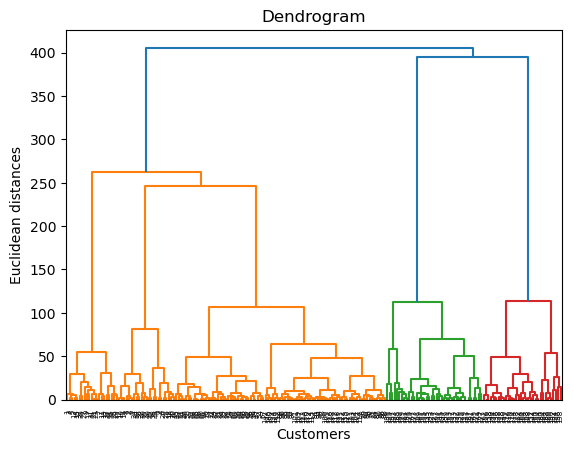

In [20]:
import scipy.cluster.hierarchy as sch

data = sch.linkage(X, method = "ward")

dendrogram = sch.dendrogram(data)

plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean distances")
plt.show()

- **linkage :** The second line of your code is calling the linkage function from the module, which performs hierarchical/agglomerative clustering on a given dataset.
- **method :** This is the linkage criterion to use, which determines how the distance between two clusters is calculated. You have set it to “ward”, which means you want to use the Ward variance minimization algorithm. This algorithm minimizes the sum of squared differences within all clusters

#### Hierarchical Clustering Model

In [21]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters= 5, affinity = "euclidean", linkage ="ward")

# fit & predict
X["h_cluster"] = hc.fit_predict(X)
X

,Income,Score,km_cluster,h_cluster
0,15,39,4,4
1,15,81,2,3
2,16,6,4,4
3,16,77,2,3
4,17,40,4,4
...,...,...,...,...
195,120,79,3,2
196,126,28,1,0
197,126,74,3,2
198,137,18,1,0


- **affinity :** This is the metric to use when calculating distance between instances in a feature array. You have set it to “euclidean”, which means you want to use the Euclidean distance (also known as the L2 norm) as the measure of similarity between points.
- **linkage :** This is the linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. You have set it to “ward”, which means you want to use the Ward variance minimization algorithm. This algorithm minimizes the sum of squared differences within all clusters

In [22]:
X["h_cluster"].unique()

array([4, 3, 1, 2, 0], dtype=int64)

In [23]:
X["h_cluster"].value_counts()

h_cluster
1    85
2    39
0    32
4    23
3    21
Name: count, dtype: int64

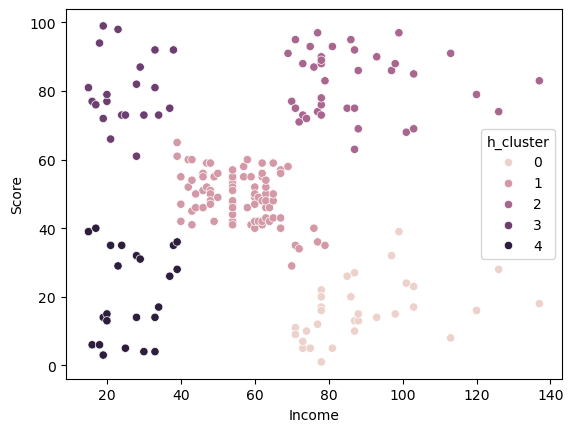

In [24]:
sns.scatterplot(x="Income",y="Score",hue="h_cluster",data=X)
plt.show()

# 3. DBSCAN Clustering

In [25]:
for r in range(1,10):
    for m in range(3,10):
        from sklearn.cluster import DBSCAN
        dbs = DBSCAN(eps=r,min_samples=m)
        X['db_cluster'] = dbs.fit_predict(X)
        
    if X["db_cluster"].nunique()==5:
        break
        
print("eps :",r)
print("min :",m)

eps : 8
min : 9


- **eps**:Radius
- **min_samples**:starts with 3 - range(3,10)

In [26]:
from sklearn.cluster import DBSCAN

dbs = DBSCAN(eps=8,min_samples=9)

X['db_cluster'] = dbs.fit_predict(X)
X

,Income,Score,km_cluster,h_cluster,db_cluster
0,15,39,4,4,-1
1,15,81,2,3,-1
2,16,6,4,4,-1
3,16,77,2,3,-1
4,17,40,4,4,-1
...,...,...,...,...,...
195,120,79,3,2,-1
196,126,28,1,0,-1
197,126,74,3,2,-1
198,137,18,1,0,-1


In [27]:
X['db_cluster'].unique()

array([-1,  0,  3,  1,  2], dtype=int64)

In [28]:
X["db_cluster"].value_counts()

db_cluster
-1    85
 0    81
 3    12
 1    12
 2    10
Name: count, dtype: int64

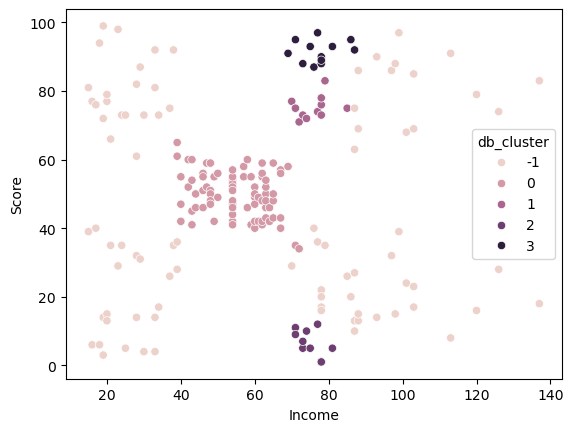

In [29]:
sns.scatterplot(x="Income",y="Score",hue="db_cluster",data=X)
plt.show()